In [45]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [46]:
runtimes_osdriver_inside_file = open("runtimes_osdriver_inside", "r").read()
runtimes_osdriver_outside_file = open("runtimes_osdriver_outside", "r").read()

In [47]:
runtimes_osdriver_inside = pd.DataFrame(columns = ['user', 'system', 'elapsed'])
runtimes_osdriver_outside = pd.DataFrame(columns = ['user', 'system', 'elapsed'])

In [48]:
def filldf(file, df):
  user = re.findall('(\d+[.,]?\d*)user', file)
  user = [float(x) for x in user]
  df["user"] = np.array(user)

  system = re.findall('(\d+[.,]?\d*)system', file)
  system = [float(x) for x in system]
  df["system"] = np.array(system)

  elapsed = re.findall('(\d+[.,]?\d*)elapsed', file)
  elapsed = [float(x) for x in elapsed]
  df["elapsed"] = np.array(elapsed)

In [49]:
filldf(runtimes_osdriver_inside_file, runtimes_osdriver_inside)
filldf(runtimes_osdriver_outside_file, runtimes_osdriver_outside)

In [50]:
def createSubplotHist(data, x, ax, title):
  '''
    data is a pandas data frame
    x is the variable to be plotted (str)
    ax is the ax object
    title is the title of the subplot (str)
  '''
  sns.histplot(data=data, x=data[x], ax=ax, bins=40, color='steelblue')
  ax.axvline(data[x].mean(),color='black',lw=2)
  ax.set_title(title, pad=20)
  ax.set_xlabel('')
  ax.set_ylabel('')

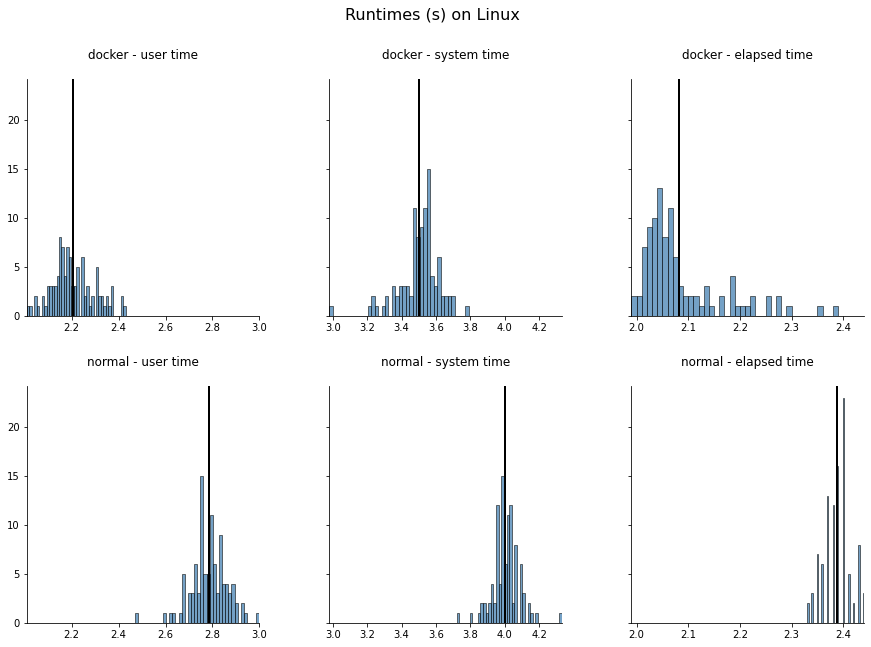

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10), sharey=True)
fig.suptitle('Runtimes (s) on Linux', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
ax = axes.ravel()

createSubplotHist(runtimes_osdriver_inside, "user", ax[0], "docker - user time")
createSubplotHist(runtimes_osdriver_inside, "system", ax[1], "docker - system time")
createSubplotHist(runtimes_osdriver_inside, "elapsed", ax[2], "docker - elapsed time")
createSubplotHist(runtimes_osdriver_outside, "user", ax[3], "normal - user time")
createSubplotHist(runtimes_osdriver_outside, "system", ax[4], "normal - system time")
createSubplotHist(runtimes_osdriver_outside, "elapsed", ax[5], "normal - elapsed time")

for i, col in zip(range(0,6), ["user", "system", "elapsed"]*2):
  ax[i].set_xlim([min(runtimes_osdriver_inside[col].min(), runtimes_osdriver_outside[col].min()), max(runtimes_osdriver_inside[col].max(), runtimes_osdriver_outside[col].max())])

sns.despine()

In [52]:
testuser = stats.ttest_ind(runtimes_osdriver_inside.user, runtimes_osdriver_outside.user)
testsystem = stats.ttest_ind(runtimes_osdriver_inside.system, runtimes_osdriver_outside.system)
testelapsed = stats.ttest_ind(runtimes_osdriver_inside.elapsed, runtimes_osdriver_outside.elapsed)

for result, time in zip([testuser, testsystem, testelapsed], ["user", "system", "elapsed"]):
  if result.pvalue > 0.05:
    print("There is no significant difference of", time, "runtimes when using docker compared to when not using docker")
    print("")
  else:
    if result.pvalue < 0.001:
      print("Significant difference of", time, "runtimes? ", "p < 0.001, t-statistic =", '{0:.2f}'.format(result.statistic))
      print("Mean runtime with docker:", '{0:.2f}'.format(runtimes_osdriver_inside[time].mean()))
      print("Mean runtime without docker:", '{0:.2f}'.format(runtimes_osdriver_outside[time].mean()))
      print("")
    else:
      print("Significant difference of", time, "runtimes? ", "p = ", '{0:.3f}'.format(result.pvalue), ", t-statistic =", '{0:.2f}'.format(result.statistic))
      print("Mean runtime with docker:", '{0:.2f}'.format(runtimes_osdriver_inside[time].mean()))
      print("Mean runtime without docker:", '{0:.2f}'.format(runtimes_osdriver_outside[time].mean()))
      print("")

Significant difference of user runtimes?  p < 0.001, t-statistic = -48.42
Mean runtime with docker: 2.20
Mean runtime without docker: 2.79

Significant difference of system runtimes?  p < 0.001, t-statistic = -35.46
Mean runtime with docker: 3.50
Mean runtime without docker: 4.00

Significant difference of elapsed runtimes?  p < 0.001, t-statistic = -35.62
Mean runtime with docker: 2.08
Mean runtime without docker: 2.39

